In [14]:
from google.colab import files

uploaded = files.upload()

Saving cookie_cats.csv to cookie_cats (1).csv


# Cookie Cats A/B Test Analysis

This notebook contains the analysis of an A/B test conducted in the mobile game Cookie Cats. The goal of the test was to determine if moving the first gate from level 30 to level 40 would impact player retention.

First rows of the dataset:
   userid  version  sum_gamerounds  retention_1  retention_7
0     116  gate_30               3        False        False
1     337  gate_30              38         True        False
2     377  gate_40             165         True        False
3     483  gate_40               1        False        False
4     488  gate_40             179         True         True


General information about the dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90189 entries, 0 to 90188
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   userid          90189 non-null  int64 
 1   version         90189 non-null  object
 2   sum_gamerounds  90189 non-null  int64 
 3   retention_1     90189 non-null  bool  
 4   retention_7     90189 non-null  bool  
dtypes: bool(2), int64(2), object(1)
memory usage: 2.2+ MB


Number of players in each version:
version
gate_40    45489
gate_30    44700
Name: count,

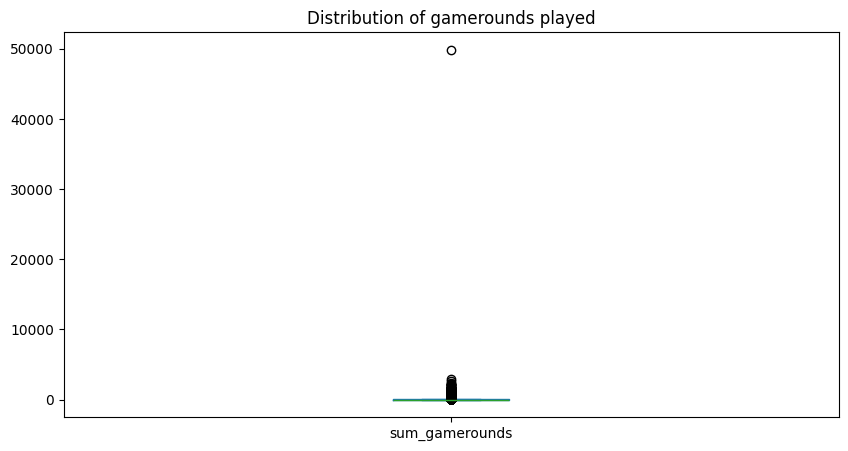

The maximum value of sum_gamerounds is:
49854

Distribution of game rounds played (after removing the outlier):


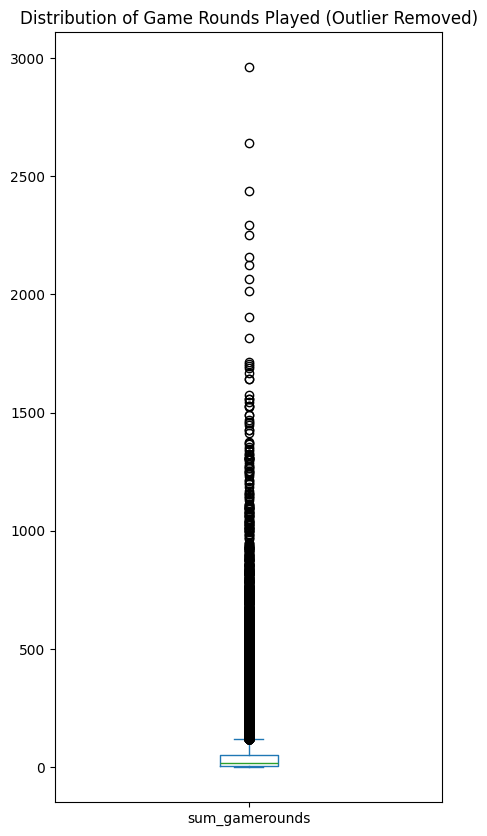


Descriptive statistics for sum_gamerounds (outlier removed):
count    90188.000000
mean        51.320253
std        102.682719
min          0.000000
25%          5.000000
50%         16.000000
75%         51.000000
max       2961.000000
Name: sum_gamerounds, dtype: float64

Descriptive statistics for sum_gamerounds by version (outlier removed):
           count       mean         std  min  25%   50%   75%     max
version                                                              
gate_30  44699.0  51.342111  102.057598  0.0  5.0  17.0  50.0  2961.0
gate_40  45489.0  51.298776  103.294416  0.0  5.0  16.0  52.0  2640.0

Retention rates by version (%):
         retention_1  retention_7
version                          
gate_30       44.819        19.02
gate_40       44.228        18.20

Contingency table for 1-day retention:
retention_1  False  True 
version                  
gate_30      24666  20034
gate_40      25370  20119
Chi-Squared Statistic For 1-day retention: 3.1591
P-value: 

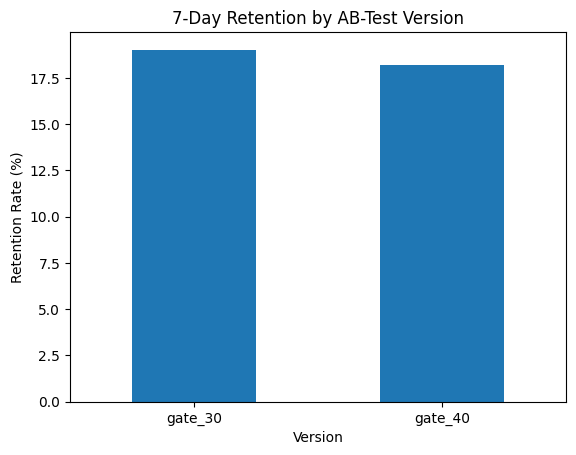

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

# Load the dataset
df = pd.read_csv("cookie_cats.csv")

# Display initial information
print("First rows of the dataset:")
print(df.head())
print("\n" + "=" * 50 + "\n")

print("General information about the dataset:")
df.info()

print("\n" + "=" * 50 + "\n")

# Number of players in each version
print("Number of players in each version:")
print(df["version"].value_counts())
print("\n" + "=" * 50 + "\n")

# Distribution of gamerounds played
print("Distribution of gamerounds played:")
df["sum_gamerounds"].plot.box(figsize=(10, 5), title="Distribution of gamerounds played")
plt.show()

# Value of the outlier
print("The maximum value of sum_gamerounds is:")
print(df['sum_gamerounds'].max())

# Remove the outlier
df_cleaned = df[df['sum_gamerounds'] < 15000]

# Distribution of game rounds played (after removing the outlier)
print("\nDistribution of game rounds played (after removing the outlier):")
df_cleaned['sum_gamerounds'].plot.box(figsize=(5, 10), title="Distribution of Game Rounds Played (Outlier Removed)")
plt.show()

# Descriptive statistics for sum_gamerounds
print("\nDescriptive statistics for sum_gamerounds (outlier removed):")
print(df_cleaned['sum_gamerounds'].describe())

# Descriptive statistics for sum_gamerounds by version
print("\nDescriptive statistics for sum_gamerounds by version (outlier removed):")
print(df_cleaned.groupby('version')['sum_gamerounds'].describe())

# Calculate retention rates by version
retention_by_version = (df.groupby('version')[['retention_1', 'retention_7']].mean() * 100).round(3)

print("\nRetention rates by version (%):")
print(retention_by_version)

# Chi-squared test for 1-day retention
contingency_table_1 = pd.crosstab(df['version'], df['retention_1'])
chi2_1, p_1, dof_1, expected_1 = chi2_contingency(contingency_table_1)
print("\nContingency table for 1-day retention:")
print(contingency_table_1)
print(f"Chi-Squared Statistic For 1-day retention: {chi2_1:.4f}")
print(f"P-value: {p_1:.4f}")

# Chi-squared test for 7-day retention
contingency_table_7 = pd.crosstab(df['version'], df['retention_7'])
chi2_7, p_7, dof_7, expected_7 = chi2_contingency(contingency_table_7)
print("\nContingency table for 7-day retention:")
print(contingency_table_7)
print(f"Chi-Squared Statistic For 7-day retention: {chi2_7:.4f}")
print(f"P-value: {p_7:.4f}")

# Plot 7-day retention by version
retention_by_version["retention_7"].plot.bar(title='7-Day Retention by AB-Test Version')
plt.ylabel('Retention Rate (%)')
plt.xlabel("Version")
plt.xticks(rotation=0)
plt.show()

## Summary and Conclusion

Based on the analysis:

* The 1-day retention rates for 'gate_30' and 'gate_40' are very similar (44.8% vs 44.2%), and the chi-squared test shows no statistically significant difference (p-value = 0.0755 > 0.05).
* The 7-day retention rates show a slightly larger difference (19.0% for 'gate_30' vs 18.2% for 'gate_40'), and the chi-squared test indicates a statistically significant difference (p-value = 0.0016 < 0.05).

The statistically significant lower 7-day retention for 'gate_40' suggests that moving the gate to level 40 negatively impacts long-term player retention.

**Recommendation:** Based on this analysis, it is recommended to **keep the gate at level 30**.